Importiamo le librerie Pandas e MatPlotLib

In [41]:
import pandas as pd
import matplotlib.pyplot as plt


In [42]:
%matplotlib notebook

Leggiamo i dati con pandas 

In [43]:
df=pd.read_csv('SALE-02from2019-01-01to2019-01-02.csv')

In [44]:
df.describe()

Theta  TimeOfFlight   TrackLength
count  4.166666e+06  4.166666e+06  4.166666e+06
mean   2.184397e+01  5.642995e+00  1.105787e+02
std    1.087221e+01  6.193566e-01  1.070750e+01
min    1.978200e-02  1.500000e-05  1.000000e+02
25%    1.336801e+01  5.275024e+00  1.027849e+02
50%    2.115180e+01  5.600006e+00  1.072239e+02
75%    2.937554e+01  5.950012e+00  1.147548e+02
max    5.983060e+01  7.999985e+00  1.989819e+02

Controlliamo i dati

In [45]:
df.head()

Theta  TimeOfFlight  TrackLength
0  26.431172      6.100037   111.673233
1  34.186287      5.549988   120.887543
2   8.410504      5.300018   101.087135
3   1.776301      5.550018   100.048073
4  12.675896      5.549988   102.498192

Introduciamo la colonna "velocità" come rapporto tra lunghezza di traccia e tempo di volo

In [46]:
df["velocita"]=df["TrackLength"]/df["TimeOfFlight"]

Prendiamo i dati con la lunghezza di traccia > 0

In [47]:
df_positivi=df[df["TimeOfFlight"]>0]

In [48]:
df_positivi

Theta  TimeOfFlight  TrackLength   velocita
0        26.431172      6.100037   111.673233  18.306976
1        34.186287      5.549988   120.887543  21.781586
2         8.410504      5.300018   101.087135  19.072980
3         1.776301      5.550018   100.048073  18.026621
4        12.675896      5.549988   102.498192  18.468183
...            ...           ...          ...        ...
4166661  28.029865      5.925003   113.288422  19.120399
4166662  20.218053      5.524994   106.566162  19.288014
4166663  26.794759      6.075012   112.028870  18.440930
4166664  22.372404      5.600006   108.139732  19.310646
4166665  13.901224      5.600006   103.017235  18.395915

[4166666 rows x 4 columns]

Rendiamo interi gli angoli così da creare le classi

In [49]:
df_positivi["Theta_int"]=df_positivi["Theta"].apply(int)

Controlo sulla congruità dei dati

In [50]:
df_positivi_filtrati= df_positivi[(df_positivi["TimeOfFlight"]<8) & (df_positivi["TrackLength"]<235) & (df_positivi["velocita"]<30)]


In [51]:
df_positivi_filtrati

Theta  TimeOfFlight  TrackLength   velocita  Theta_int
0        26.431172      6.100037   111.673233  18.306976         26
1        34.186287      5.549988   120.887543  21.781586         34
2         8.410504      5.300018   101.087135  19.072980          8
3         1.776301      5.550018   100.048073  18.026621          1
4        12.675896      5.549988   102.498192  18.468183         12
...            ...           ...          ...        ...        ...
4166661  28.029865      5.925003   113.288422  19.120399         28
4166662  20.218053      5.524994   106.566162  19.288014         20
4166663  26.794759      6.075012   112.028870  18.440930         26
4166664  22.372404      5.600006   108.139732  19.310646         22
4166665  13.901224      5.600006   103.017235  18.395915         13

[4142999 rows x 5 columns]

Rendiamo come index la colonna Theta-int

In [52]:
df_positivi_filtrati.set_index("Theta_int",inplace=True)

In [53]:
df_positivi_filtrati

Theta  TimeOfFlight  TrackLength   velocita
Theta_int                                                 
26         26.431172      6.100037   111.673233  18.306976
34         34.186287      5.549988   120.887543  21.781586
8           8.410504      5.300018   101.087135  19.072980
1           1.776301      5.550018   100.048073  18.026621
12         12.675896      5.549988   102.498192  18.468183
...              ...           ...          ...        ...
28         28.029865      5.925003   113.288422  19.120399
20         20.218053      5.524994   106.566162  19.288014
26         26.794759      6.075012   112.028870  18.440930
22         22.372404      5.600006   108.139732  19.310646
13         13.901224      5.600006   103.017235  18.395915

[4142999 rows x 4 columns]

In [54]:
df_positivi_filtrati.describe()

Theta  TimeOfFlight   TrackLength      velocita
count  4.142999e+06  4.142999e+06  4.142999e+06  4.142999e+06
mean   2.183542e+01  5.661208e+00  1.105739e+02  1.960465e+01
std    1.087503e+01  5.680972e-01  1.071368e+01  1.546239e+00
min    1.978200e-02  3.349976e+00  1.000000e+02  1.251470e+01
25%    1.335710e+01  5.299988e+00  1.027803e+02  1.858893e+01
50%    2.113879e+01  5.600006e+00  1.072145e+02  1.952587e+01
75%    2.936176e+01  5.950012e+00  1.147393e+02  2.053135e+01
max    5.763587e+01  7.999985e+00  1.868118e+02  2.999989e+01

In funzione di theta calcoliamo la media delle velocità, dei tempi di volo e delle lunghezze di traccia 

In [55]:
v_theta=df_positivi_filtrati.groupby("Theta_int")["velocita"].mean()
tof_theta=df_positivi_filtrati.groupby("Theta_int")["TimeOfFlight"].mean()
tl_theta=df_positivi_filtrati.groupby("Theta_int")["TrackLength"].mean()

In [56]:
v_theta.head(100)

Theta_int
0     19.029490
1     19.053684
2     19.055348
3     19.070910
4     19.050557
5     19.098205
6     19.075077
7     19.130430
8     19.095442
9     19.140544
10    19.137592
11    19.153993
12    19.179036
13    19.184018
14    19.232878
15    19.226362
16    19.285740
17    19.325447
18    19.356548
19    19.415054
20    19.417505
21    19.505859
22    19.534317
23    19.556317
24    19.630668
25    19.677134
26    19.713162
27    19.786881
28    19.835465
29    19.885906
30    19.966246
31    20.031370
32    20.073535
33    20.134360
34    20.187602
35    20.261504
36    20.301981
37    20.351900
38    20.415020
39    20.466583
40    20.520008
41    20.606801
42    20.658528
43    20.723766
44    20.794832
45    20.858119
46    20.943240
47    21.029192
48    21.143203
49    21.259692
50    21.415797
51    21.621924
52    21.847982
53    22.139383
54    22.397097
55    22.791620
56    23.232245
57    23.477529
Name: velocita, dtype: float64

In [57]:
v_theta

Theta_int
0     19.029490
1     19.053684
2     19.055348
3     19.070910
4     19.050557
5     19.098205
6     19.075077
7     19.130430
8     19.095442
9     19.140544
10    19.137592
11    19.153993
12    19.179036
13    19.184018
14    19.232878
15    19.226362
16    19.285740
17    19.325447
18    19.356548
19    19.415054
20    19.417505
21    19.505859
22    19.534317
23    19.556317
24    19.630668
25    19.677134
26    19.713162
27    19.786881
28    19.835465
29    19.885906
30    19.966246
31    20.031370
32    20.073535
33    20.134360
34    20.187602
35    20.261504
36    20.301981
37    20.351900
38    20.415020
39    20.466583
40    20.520008
41    20.606801
42    20.658528
43    20.723766
44    20.794832
45    20.858119
46    20.943240
47    21.029192
48    21.143203
49    21.259692
50    21.415797
51    21.621924
52    21.847982
53    22.139383
54    22.397097
55    22.791620
56    23.232245
57    23.477529
Name: velocita, dtype: float64

Plottiamo le lunghezze di traccia

<IPython.core.display.Javascript object>


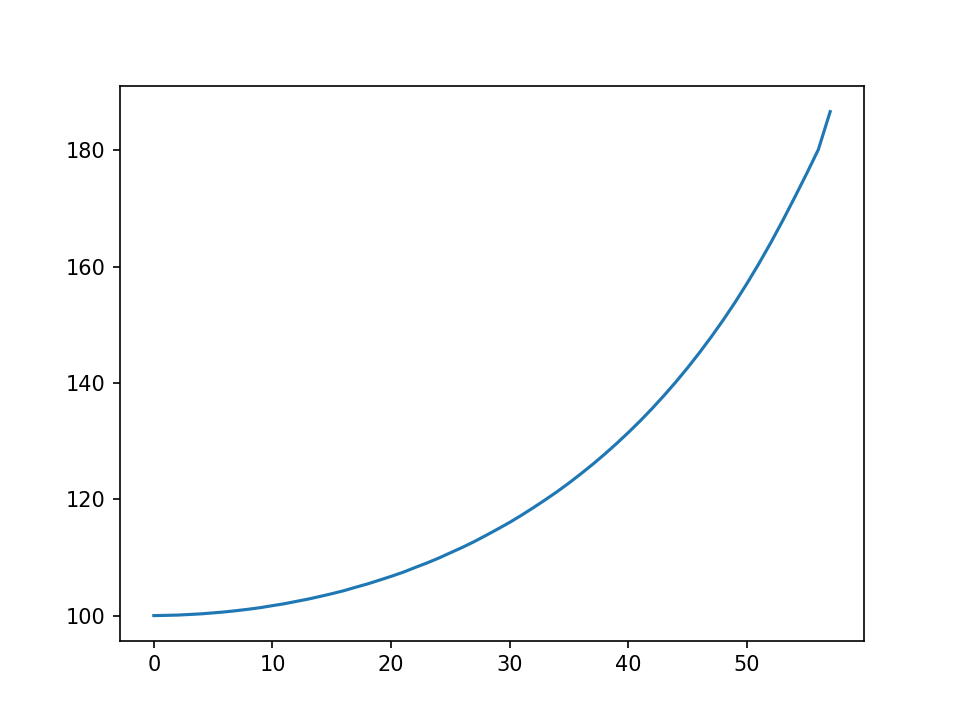

In [58]:
plt.figure()
plt.plot(tl_theta)
plt.title ="Track Length"

Plottiamo il tempo di volo

<IPython.core.display.Javascript object>


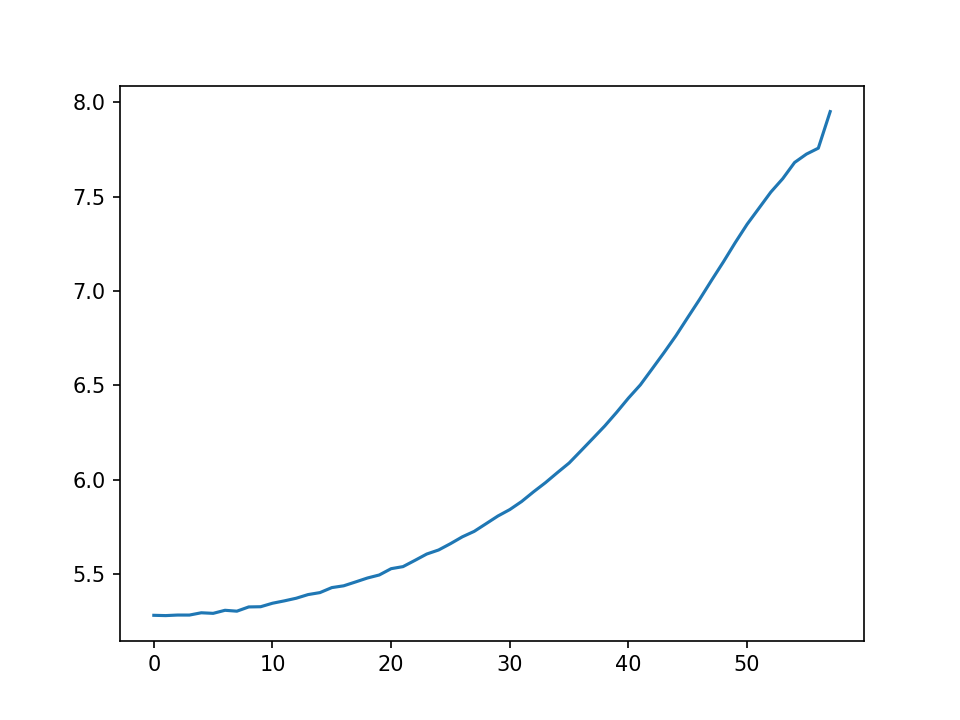

In [59]:
plt.figure()
plt.plot(tof_theta)
plt.title ="Time of Flight"

Plottiamo le velocità

<IPython.core.display.Javascript object>


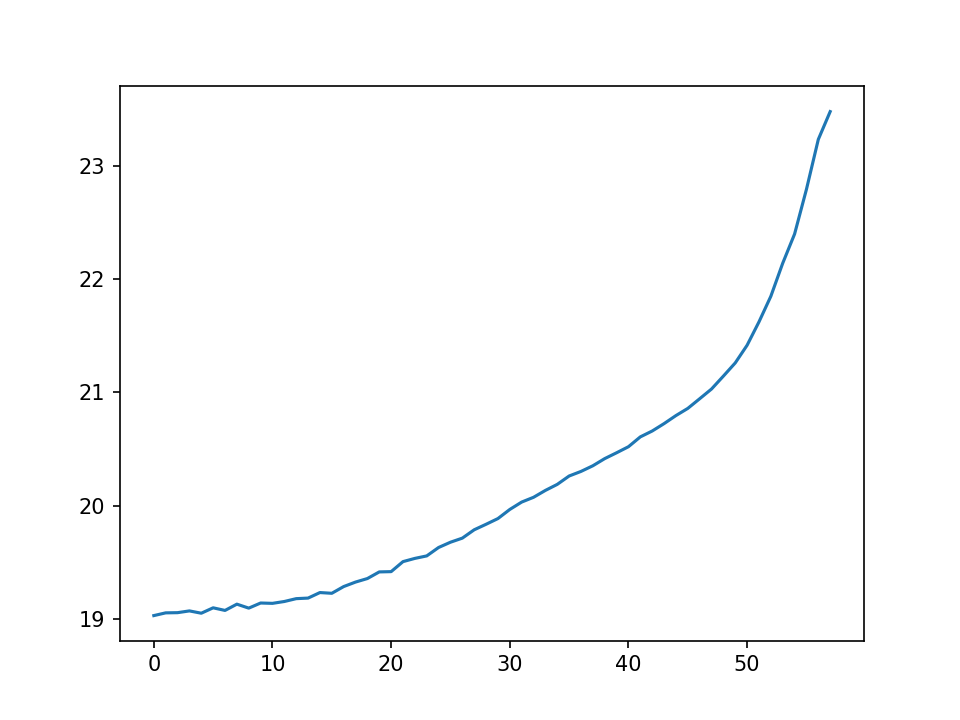

In [60]:
plt.figure()
plt.plot(v_theta)
plt.title ="velocità"